In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from matplotlib import colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.base import clone 
from matplotlib.font_manager import FontProperties
%matplotlib inline

In [2]:
# In order to display Plotly plots in a Jupyter Notebook
import plotly.io as pio 
pio.renderers.default = 'notebook'

In [3]:
fig_x = 15
fig_y = 12
x_label = 13
y_label = 13
title_size = 15

# 事故CPD

In [4]:
cpd = pd.read_excel('CPD_crash_1.xlsx')
print(cpd.shape)
print(cpd.columns)
cpd.head(2)

(15, 11)
Index(['crash_1_temperature_0', 'crash_1_temperature_1',
       'crash_1_temperature_2', 'crash_1_volume_0', 'crash_1_volume_1',
       'crash_1_volume_2', 'crash_1_weather_0', 'crash_1_weather_1',
       'crash_1_weather_2', 'crash_1_weather_3', 'crash_1_weather_4'],
      dtype='object')


,crash_1_temperature_0,crash_1_temperature_1,crash_1_temperature_2,crash_1_volume_0,crash_1_volume_1,crash_1_volume_2,crash_1_weather_0,crash_1_weather_1,crash_1_weather_2,crash_1_weather_3,crash_1_weather_4
0,0.024536,0.012014,0.016139,0.024536,0.058206,0.020367,0.024536,0.016222,0.030354,0.074866,0.019001
1,0.016222,0.024659,0.029685,0.016222,0.027149,0.010870,0.058206,0.027149,0.063380,0.186335,0.048458


In [5]:
data = pd.DataFrame()

tem = pd.DataFrame()
tem['CPD0'] = cpd[['crash_1_temperature_0']]
tem['Temperature'] = 'Cold'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD0'] = cpd[['crash_1_temperature_1']]
tem['Temperature'] = 'Cool'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD0'] = cpd[['crash_1_temperature_2']]
tem['Temperature'] = 'Hot'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD1'] = cpd[['crash_1_volume_0']]
tem['Volume'] = 'Low level'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD1'] = cpd[['crash_1_volume_1']]
tem['Volume'] = 'Middle level'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD1'] = cpd[['crash_1_volume_2']]
tem['Volume'] = 'High level'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD2'] = cpd[['crash_1_weather_0']]
tem['Weather'] = 'Cloudy'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD2'] = cpd[['crash_1_weather_1']]
tem['Weather'] = 'Foggy'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD2'] = cpd[['crash_1_weather_2']]
tem['Weather'] = 'Rainy'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD2'] = cpd[['crash_1_weather_3']]
tem['Weather'] = 'Snowy'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD2'] = cpd[['crash_1_weather_4']]
tem['Weather'] = 'Sunny'
data = pd.concat([data,tem],axis=0)

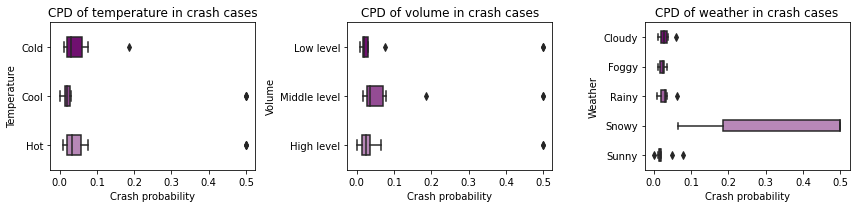

In [6]:
width = 0.4

plt.figure(figsize=(12,3))
purple_cmap = colors.LinearSegmentedColormap.from_list("Purple", ["purple", "white"])

plt.subplot(1, 3, 1)
labels = data['Temperature'].unique()
norm = colors.Normalize(vmin=0, vmax=len(labels))
color_list = [colors.rgb2hex(purple_cmap(norm(i))) for i in range(len(labels))]
custom_palette = sns.color_palette(color_list)
sns.boxplot(x='CPD0', y='Temperature', data=data, width=width, palette=custom_palette)
#plt.ylabel('Temperature',fontsize=i,fontproperties='Times New Roman')
plt.ylabel('Temperature')
plt.xlabel('Crash probability')
plt.title('CPD of temperature in crash cases')
plt.tight_layout()

plt.subplot(1, 3, 2)
labels = data['Volume'].unique()
norm = colors.Normalize(vmin=0, vmax=len(labels))
color_list = [colors.rgb2hex(purple_cmap(norm(i))) for i in range(len(labels))]
custom_palette = sns.color_palette(color_list)
sns.boxplot(x='CPD1', y='Volume', data=data, width=width, palette=custom_palette)
plt.ylabel('Volume')
plt.xlabel('Crash probability')
plt.title('CPD of volume in crash cases')
plt.tight_layout()

plt.subplot(1, 3, 3)
labels = data['Weather'].unique()
norm = colors.Normalize(vmin=0, vmax=len(labels))
color_list = [colors.rgb2hex(purple_cmap(norm(i))) for i in range(len(labels))]
custom_palette = sns.color_palette(color_list)
sns.boxplot(x='CPD2', y='Weather', data=data, width=width, palette=custom_palette)
plt.ylabel('Weather')
plt.xlabel('Crash probability')
plt.title('CPD of weather in crash cases')
plt.tight_layout()
#plt.text(1.95,0.4,'Crash',fontsize=10,weight='bold')
plt.savefig('Fig/Crash cases.jpg',dpi=500)
plt.show()